In [ ]:
%pylab inline

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:18.                                                 


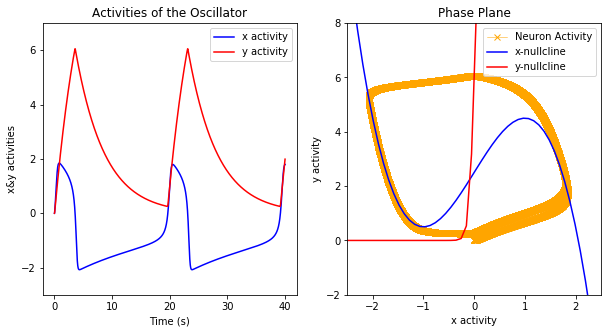

In [27]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

I =.5
epsilon=.2
gamma=6.0
beta=0.1
syn=0.1

n_neurons = 500
neuron_type = nengo.Direct()
syn_probe = 0.01

net = nengo.Network(label='Relaxation Oscillator')
with net:
    inp = nengo.Node(I)

    oscillator_x = nengo.Ensemble(
        n_neurons=n_neurons, dimensions=1, neuron_type=neuron_type,
        radius=2, intercepts=np.zeros(n_neurons))

    oscillator_y = nengo.Ensemble(
        n_neurons=n_neurons, dimensions=1, neuron_type=neuron_type,
        radius=7)

    '''
    # osc to osc connection
    def feedback(x):
        x,y = x
        dx =  3 * x - x**3 + 2 - y
        dy = epsilon * (gamma * (1 + np.tanh(x / beta)) - y)
        return [syn*dx+x,syn*dy+y]
    '''

    nengo.Connection(oscillator_x, oscillator_x, synapse=syn,
                     function=lambda x: syn*(3*x - x**3 + 2) + x)
    nengo.Connection(oscillator_x, oscillator_y, synapse=syn,
                     function=lambda x: syn*(epsilon * (gamma * (1 + np.tanh(x / beta)))))
    nengo.Connection(oscillator_y, oscillator_x, synapse=syn,
                     function=lambda y: syn*(-y))
    nengo.Connection(oscillator_y, oscillator_y, synapse=syn,
                     function=lambda y: syn*(epsilon * (-y)) + y)

    # inp to osc connection
    nengo.Connection(inp, oscillator_x, transform=syn, synapse=syn)
    x_pr = nengo.Probe(oscillator_x, synapse=syn_probe)
    y_pr = nengo.Probe(oscillator_y, synapse=syn_probe)

with nengo.Simulator(net) as sim:
    sim.run(40)

t = sim.trange()
# xy activities
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.add_subplot(1, 2, 1)
ax1.plot(t, sim.data[x_pr], label="x activity", color='b')
ax1.plot(t, sim.data[y_pr], label="y activity", color='r')
ax1.set_title("Activities of the Oscillator")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("x&y activities")
ax1.set_ylim(-3, 7)
ax1.legend()

# phase plane
xmin, xmax, ymin, ymax = -2.5, 2.5, -2, 8
ax2 = fig1.add_subplot(1, 2, 2)
ax2.plot(sim.data[x_pr], sim.data[y_pr], label="Neuron Activity", color='#ffa500', linewidth=.5, marker='x')
X = np.linspace(xmin, xmax)
ax2.plot(X, 3. * X - X ** 3 + 2 + I, label='x-nullcline', color='b')
ax2.plot(X, gamma * (1 + np.tanh(X / beta)), label='y-nullcline', color='r')
ax2.set_title("Phase Plane")
ax2.set_xlabel("x activity")
ax2.set_ylabel("y activity")
ax2.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)
ax2.legend()
plt.show()

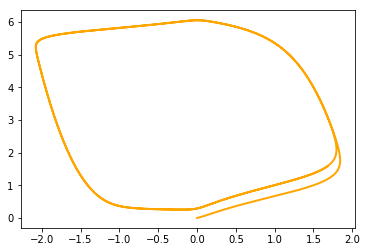

In [7]:
import pylab

pylab.figure()
pylab.plot(sim.data[x_pr], sim.data[y_pr], label="Neuron Activity", color='#ffa500', linewidth=2)
pylab.show()

In [8]:
np.sqrt(5**2 + 2**2)

5.3851648071345037

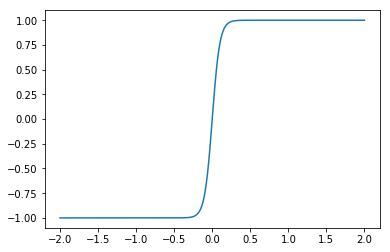

In [20]:
X = np.linspace(-2, 2, 1000)
Y = np.tanh(X / beta)

pylab.figure()
pylab.plot(X, Y)
pylab.show()

Building finished in 0:00:01.                                                   


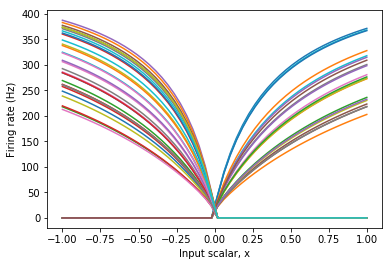

In [26]:
from nengo.utils.ensemble import tuning_curves

with nengo.Network() as model:
    x = nengo.Ensemble(
        n_neurons=50, dimensions=1, intercepts=np.zeros(50))

with nengo.Simulator(model) as sim:
    plt.plot(*tuning_curves(x, sim))

plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")
plt.show()